# Importing CAMB

## Importing relevant libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
sns.set_style('darkgrid')
from sympy import* 


#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/bekithemba/.local/lib/python3.9/site-packages/camb-1.3.5-py3.9.egg/camb


In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= 0.15, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

In [4]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


### Defining variables

In [5]:
a = symbols('a')
z= symbols('z')
s = symbols('s')
D = Function('D_L^F')(z)
theta = Function('theta')(z)
E_z=Function('E_z')(z)
W_z = Function('W_z')(z)
T = Function('T')('s')

### Defining Constants

In [6]:
Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7

### Reconstructing the Equation of state $w(z)$

# $\Omega_{DE}e^{\theta(z)}$

In [7]:
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)

((z + 1)**2*(0.000999999999999945*(z + 1)**3 - 0.001*(z + 1)**2 + 0.0003*(z + 1)*D_L^F(z)**2 + 0.7) + 0.0007*D_L^F(z)**2)/(z + 1)**2

## differentiate  $\Omega_{DE}e^{\theta(z)}$

In [8]:
g = (theta_z.diff(z));g

-0.002*z + 2*(0.0003*z + 0.0003)*D_L^F(z)*Derivative(D_L^F(z), z) + 0.00299999999999984*(z + 1)**2 + 0.0003*D_L^F(z)**2 - 0.002 + 0.0014*D_L^F(z)*Derivative(D_L^F(z), z)/(z + 1)**2 - 0.0014*D_L^F(z)**2/(z + 1)**3

## Divide $\frac{\theta'(z)\Omega_{DE}e^{\theta(z)}}{\Omega_{DE}e^{\theta(z)}}$

## $\theta'(z)$

In [9]:
p = simplify((g/theta_z));p

((z + 1)**3*(-0.002*z + 0.00299999999999984*(z + 1)**2 + 0.0006*(z + 1)*D_L^F(z)*Derivative(D_L^F(z), z) + 0.0003*D_L^F(z)**2 - 0.002) + 0.0014*(z + 1)*D_L^F(z)*Derivative(D_L^F(z), z) - 0.0014*D_L^F(z)**2)/((z + 1)*((z + 1)**2*(0.000999999999999945*(z + 1)**3 - 0.001*(z + 1)**2 + 0.0003*(z + 1)*D_L^F(z)**2 + 0.7) + 0.0007*D_L^F(z)**2))

## Substitute $\theta'(z)$ into $w(z) = \frac{1+z}{3}\theta'(z) -1$

## To get the reconstructed equation of state $w(z)$

In [10]:
W_z = ((p*(1+z))/3) -1;W_z

-1 + ((z + 1)**3*(-0.002*z + 0.00299999999999984*(z + 1)**2 + 0.0006*(z + 1)*D_L^F(z)*Derivative(D_L^F(z), z) + 0.0003*D_L^F(z)**2 - 0.002) + 0.0014*(z + 1)*D_L^F(z)*Derivative(D_L^F(z), z) - 0.0014*D_L^F(z)**2)/(3*((z + 1)**2*(0.000999999999999945*(z + 1)**3 - 0.001*(z + 1)**2 + 0.0003*(z + 1)*D_L^F(z)**2 + 0.7) + 0.0007*D_L^F(z)**2))

## Scale factor $a = \frac{1}{1+z}$

### $z = \frac{1}{a}-1$

In [11]:
c = (1/a) - 1;c

-1 + 1/a

### Numerical Estimation of $D_L^F(z)$

### $D_L^F(z) = \frac{(1+z)}{\sqrt{s\Omega_m}}\left[T(s) - T(\frac{s}{1+z})\right]$

### $s = \sqrt[3]{\frac{1-\Omega_m}{\Omega_m}}$

In [12]:
s = cbrt((1-Omega_m)/Omega_m);s

1.32635240263213

In [13]:
T = 2*sqrt(s)*(1-(1/14)*s**3);T

1.91945623277367

In [14]:
T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3);T_s

2.30334747932841*(1 - 0.166666666666667/(z + 1)**3)*sqrt(1/(z + 1))

## $D_L^F(z)$

In [15]:
D = (((1+z)/(s*Omega_m))*((T-T_s)));D

(2.51315813709718*z + 2.51315813709718)*(-2.30334747932841*(1 - 0.166666666666667/(z + 1)**3)*sqrt(1/(z + 1)) + 1.91945623277367)

## $D_L^F(a)$

In [16]:
D = D.subs(z,c);D

2.51315813709718*(-2.30334747932841*sqrt(a)*(1 - 0.166666666666667*a**3) + 1.91945623277367)/a

## $E^F(z)$

In [17]:
E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m));E_z

0.836660026534076*sqrt(0.428571428571429*(z + 1)**3 - 1)

## $E^F(a)$

In [18]:
E_z = E_z.subs(z,c);E_z

0.836660026534076*sqrt(-1 + 0.428571428571429/a**3)

## $(D_L^F(a))'$

In [19]:
d=(1/a)/E_z + D /(1/a);d

-5.78867646023646*sqrt(a)*(1 - 0.166666666666667*a**3) + 4.82389705019705 + 1.19522860933439/(a*sqrt(-1 + 0.428571428571429/a**3))

## $w(a)$

In [20]:
Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1;Wa

(0.00351842139193605*(-2.30334747932841*sqrt(a)*(1 - 0.166666666666667*a**3) + 1.91945623277367)*(-5.78867646023646*sqrt(a)*(1 - 0.166666666666667*a**3) + 4.82389705019705 + 1.19522860933439/(a*sqrt(-1 + 0.428571428571429/a**3)))/a**2 - 0.046912285225814*(-sqrt(a)*(1 - 0.166666666666667*a**3) + 0.833333333333333)**2/a**2 + (-0.002/a + 0.00150789488225831*(-2.30334747932841*sqrt(a)*(1 - 0.166666666666667*a**3) + 1.91945623277367)*(-5.78867646023646*sqrt(a)*(1 - 0.166666666666667*a**3) + 4.82389705019705 + 1.19522860933439/(a*sqrt(-1 + 0.428571428571429/a**3)))/a**2 + 0.0100526325483887*(-sqrt(a)*(1 - 0.166666666666667*a**3) + 0.833333333333333)**2/a**2 + 0.00299999999999978/a**2)/a**3)/(2.1 + 0.070368427838721*(-sqrt(a)*(1 - 0.166666666666667*a**3) + 0.833333333333333)**2/a**2 - 0.003/a**2 + 0.00299999999999984/a**3 + 0.0301578976451662*(-sqrt(a)*(1 - 0.166666666666667*a**3) + 0.833333333333333)**2/a**5) - 1

## Tabulated $w(a)$ versus $a$

In [21]:
#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')


## Importing the relevant dark energy model to generate a plot of tabulated $w(a)$ versus $a$ 

Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-22-e9e343c5940c>:53: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


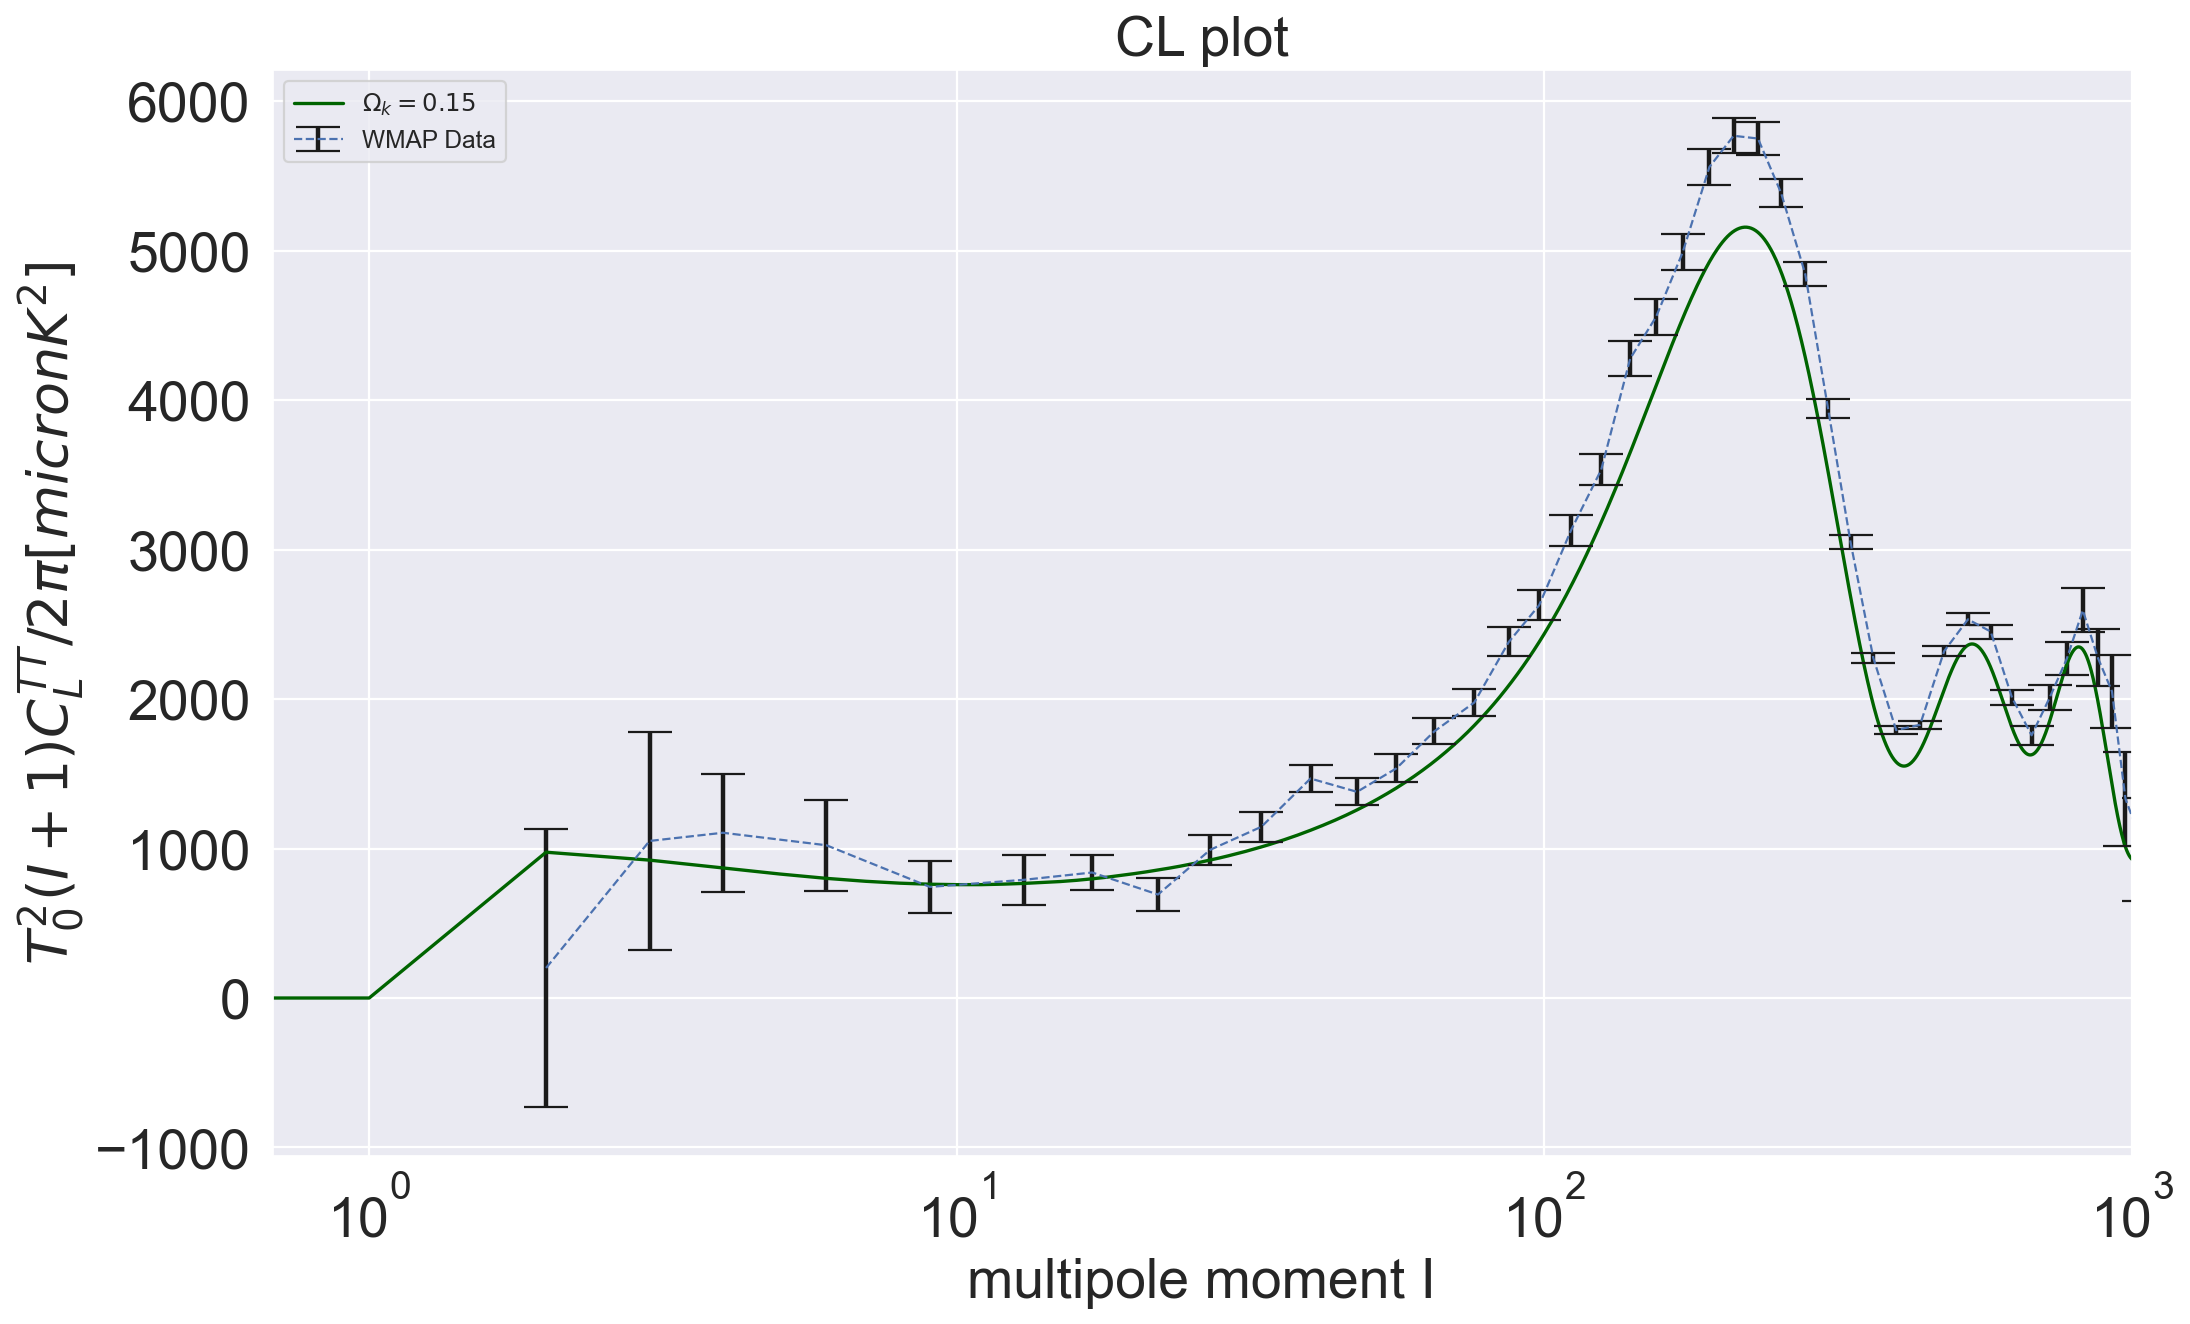

In [22]:
from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = 0.15$','WMAP Data'], loc ='upper left')
plt.show()


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-23-94b2b2dcb2b6>:121: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


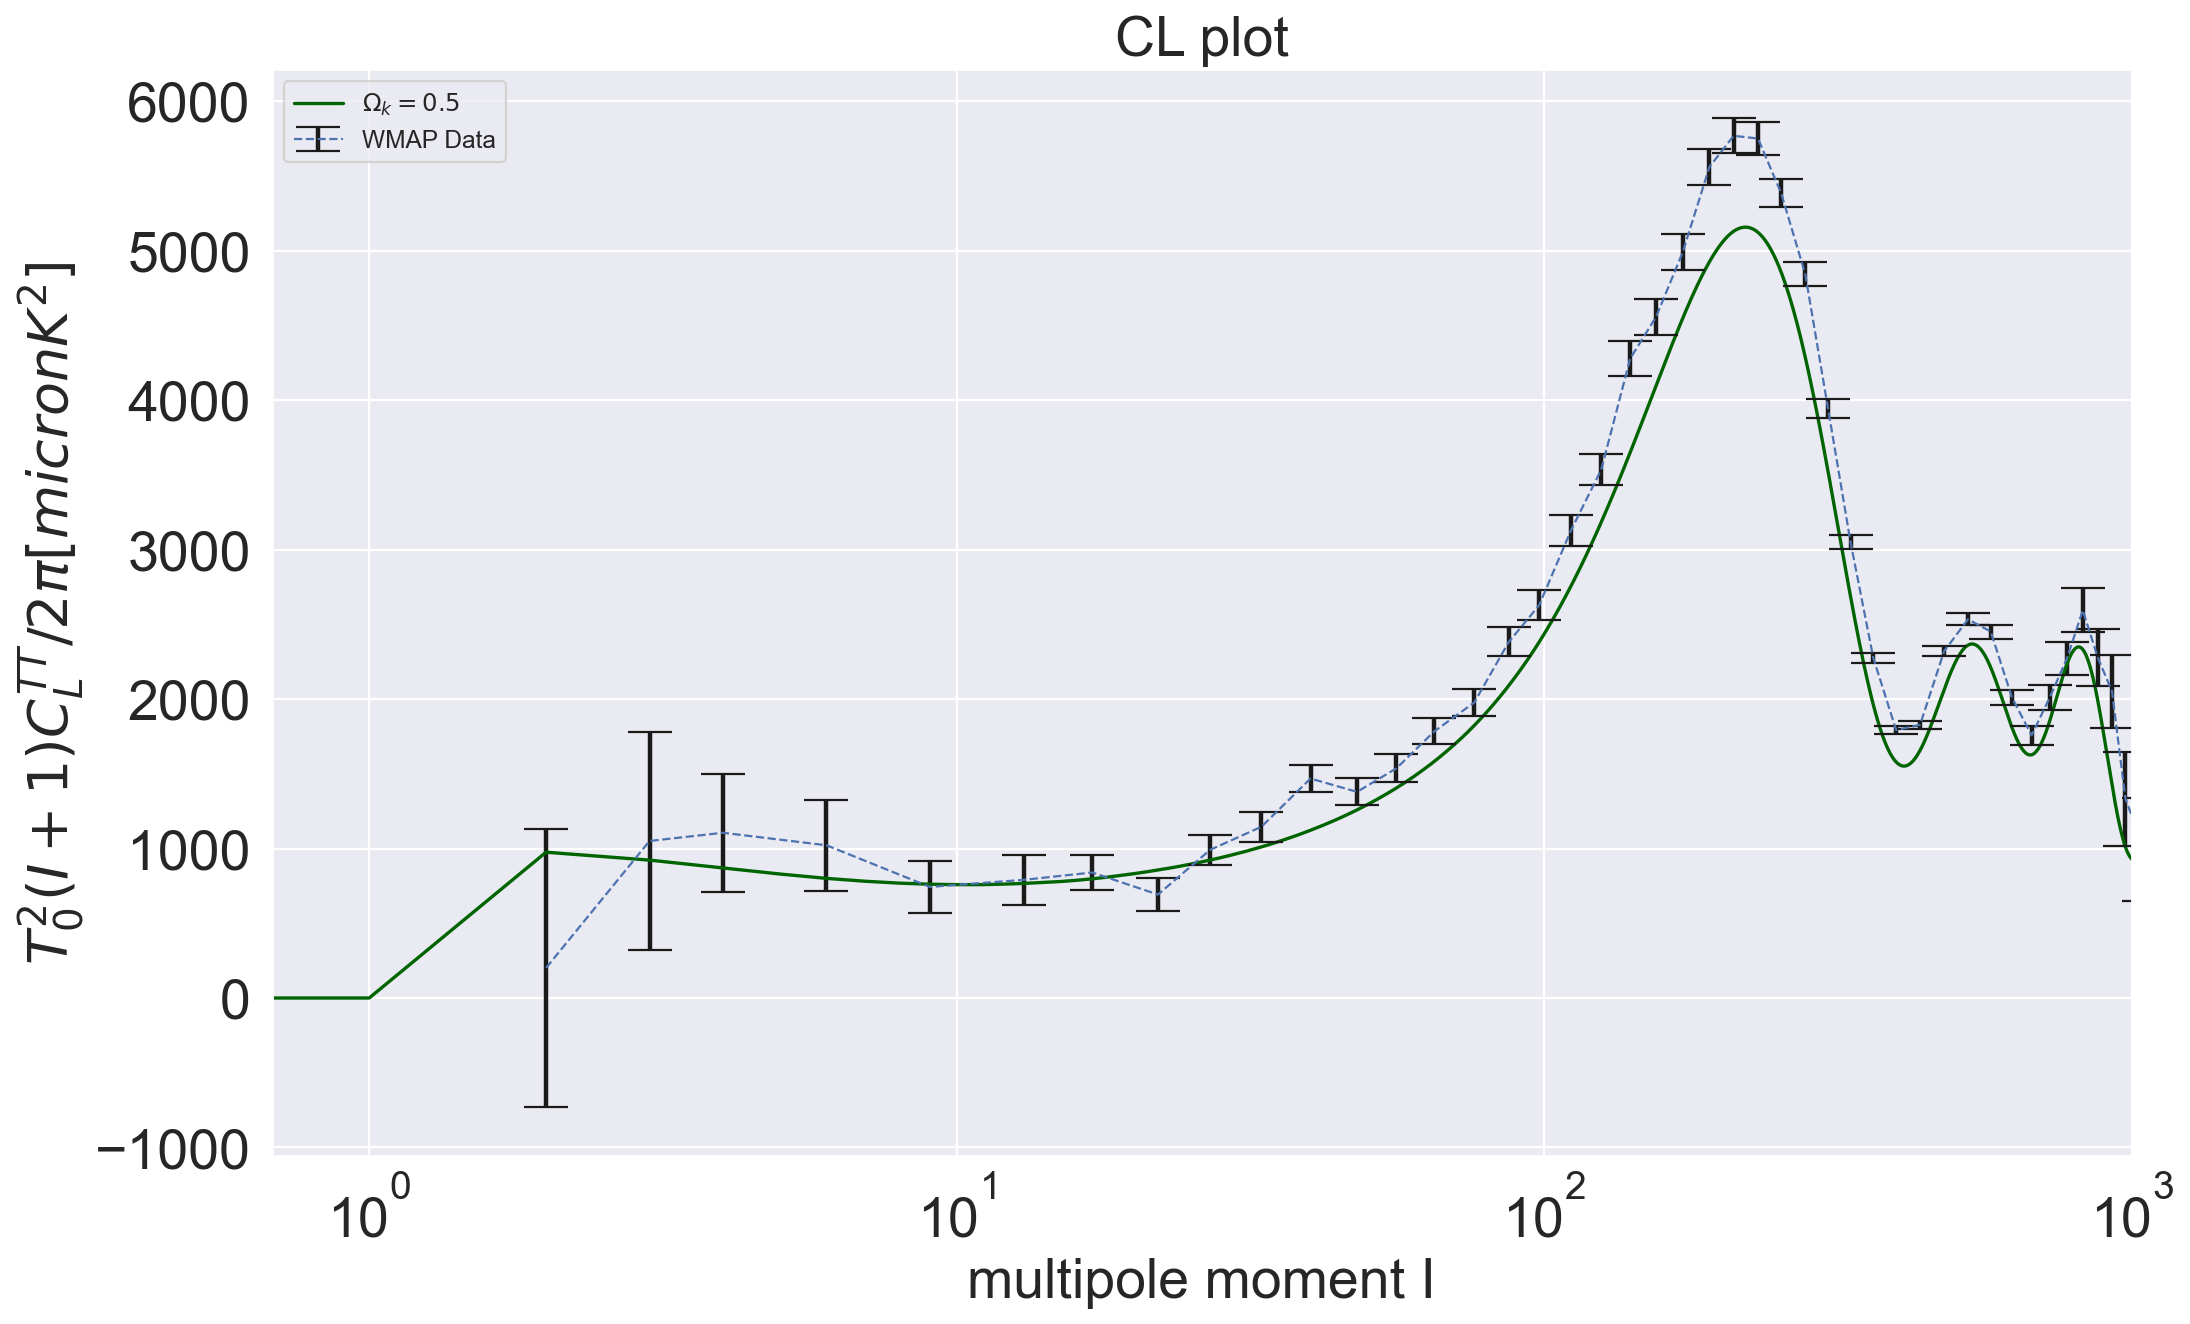

In [23]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= 0.5, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7    
 
    
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)
g = (theta_z.diff(z))

p = simplify((g/theta_z))

W_z = ((p*(1+z))/3) -1

c = (1/a) - 1
s = cbrt((1-Omega_m)/Omega_m)
T = 2*sqrt(s)*(1-(1/14)*s**3)

T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3)

D = (((1+z)/(s*Omega_m))*((T-T_s)))

D = D.subs(z,c)

E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m))
E_z = E_z.subs(z,c)
d=(1/a)/E_z + D /(1/a)

Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1

#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')

from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = 0.5$','WMAP Data'], loc ='upper left')
plt.show()



total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-24-2a4e3d997e8d>:121: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


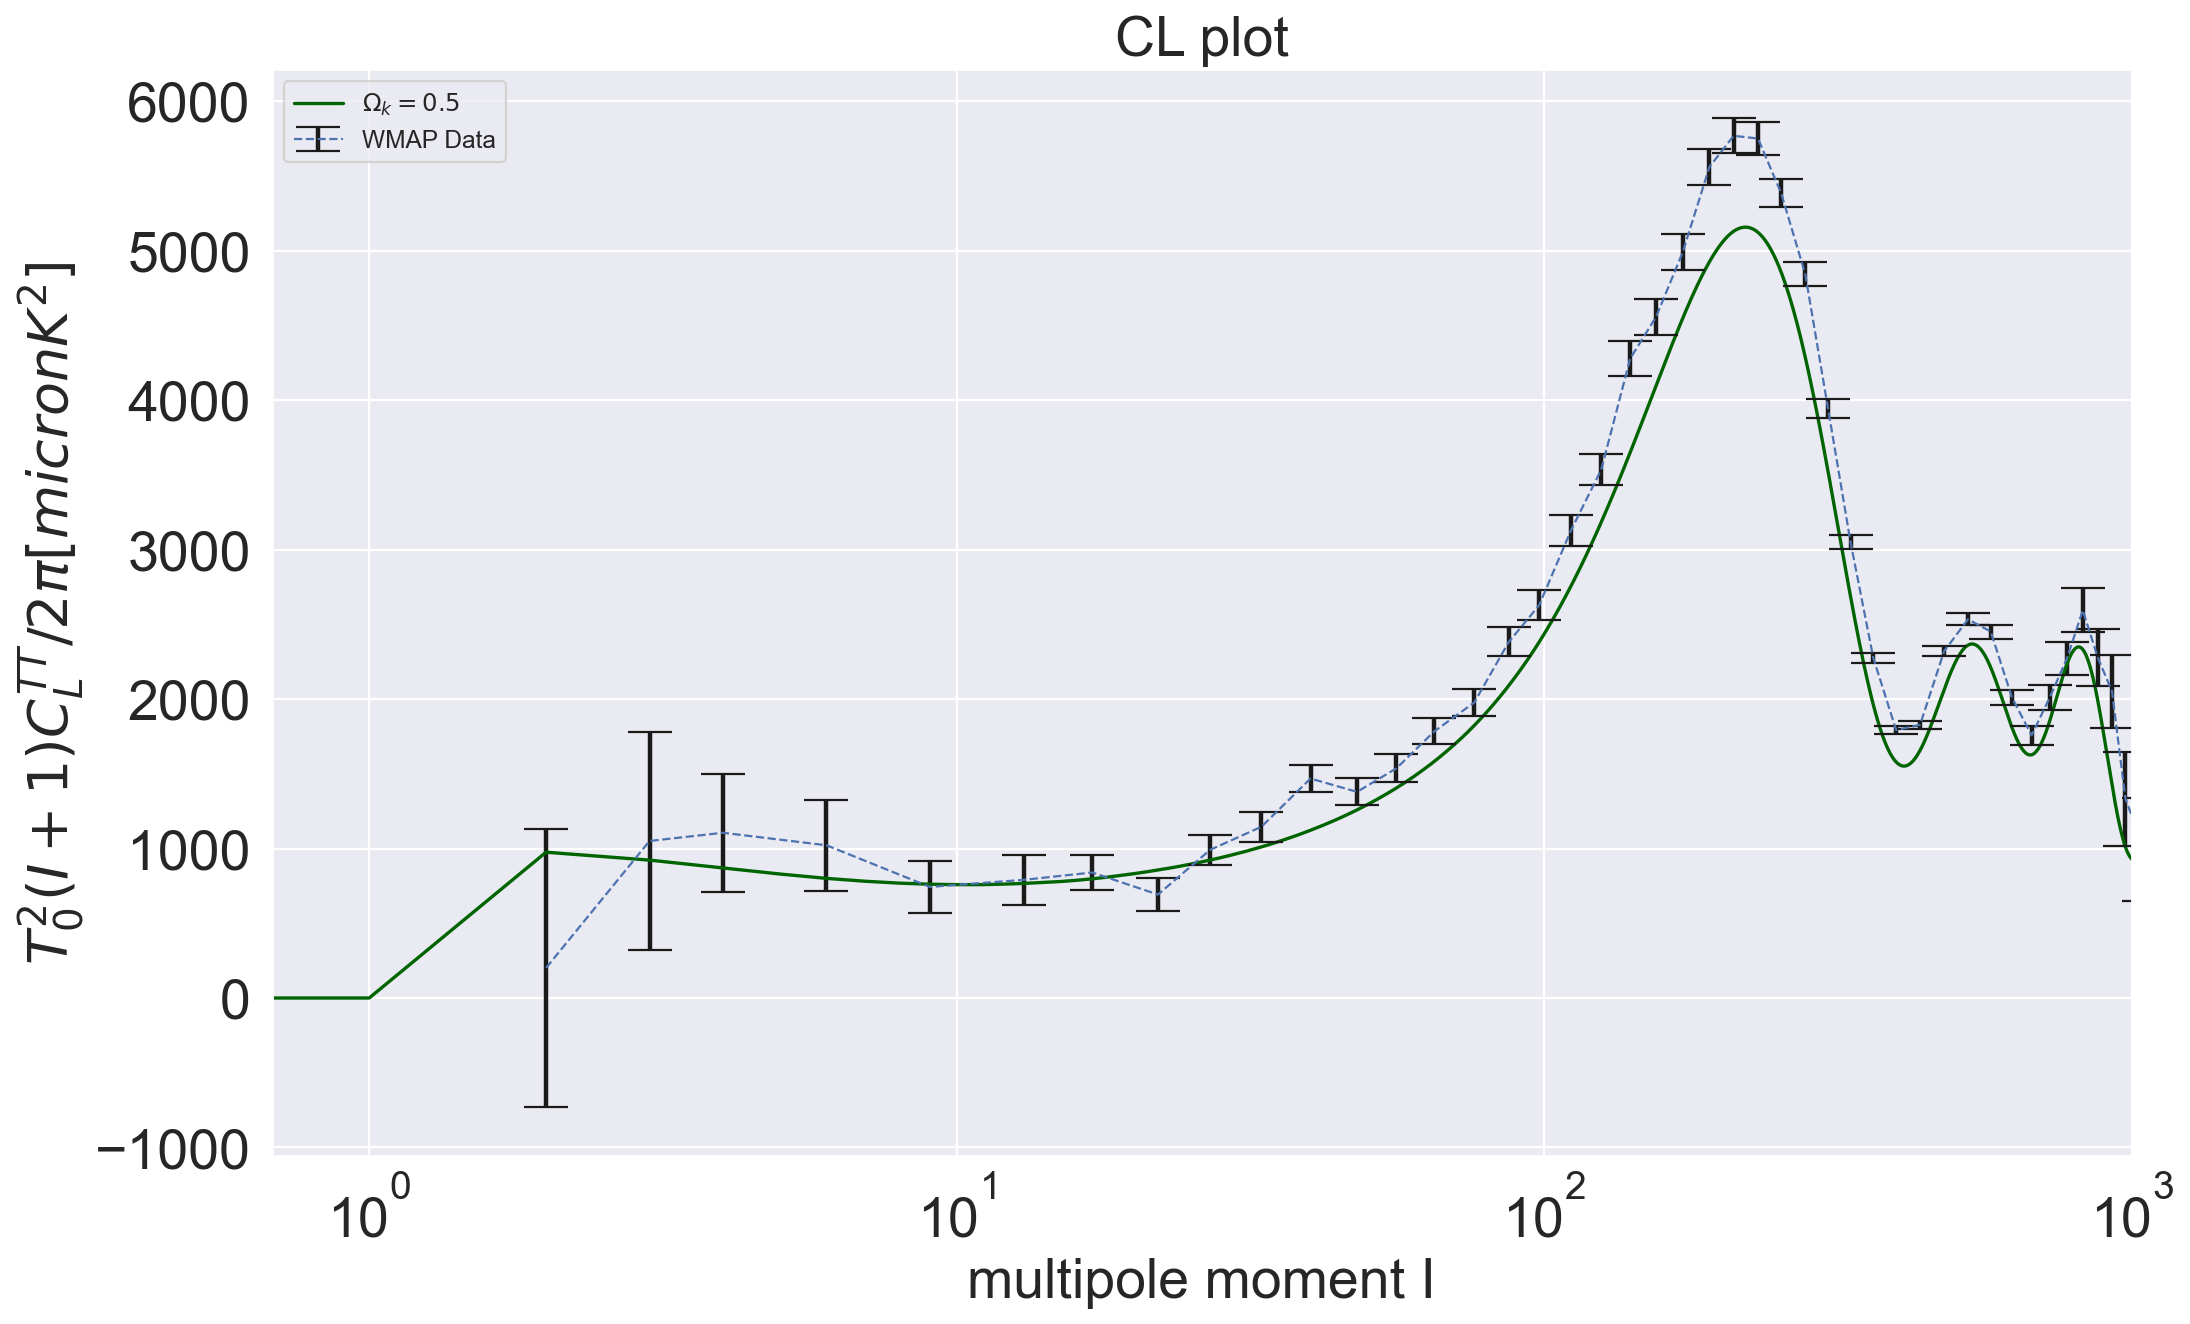

In [24]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= 0., tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7    
 
    
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)
g = (theta_z.diff(z))

p = simplify((g/theta_z))

W_z = ((p*(1+z))/3) -1

c = (1/a) - 1
s = cbrt((1-Omega_m)/Omega_m)
T = 2*sqrt(s)*(1-(1/14)*s**3)

T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3)

D = (((1+z)/(s*Omega_m))*((T-T_s)))

D = D.subs(z,c)

E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m))
E_z = E_z.subs(z,c)
d=(1/a)/E_z + D /(1/a)

Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1

#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')

from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = 0.5$','WMAP Data'], loc ='upper left')
plt.show()


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-25-f3a4f09d67a7>:121: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


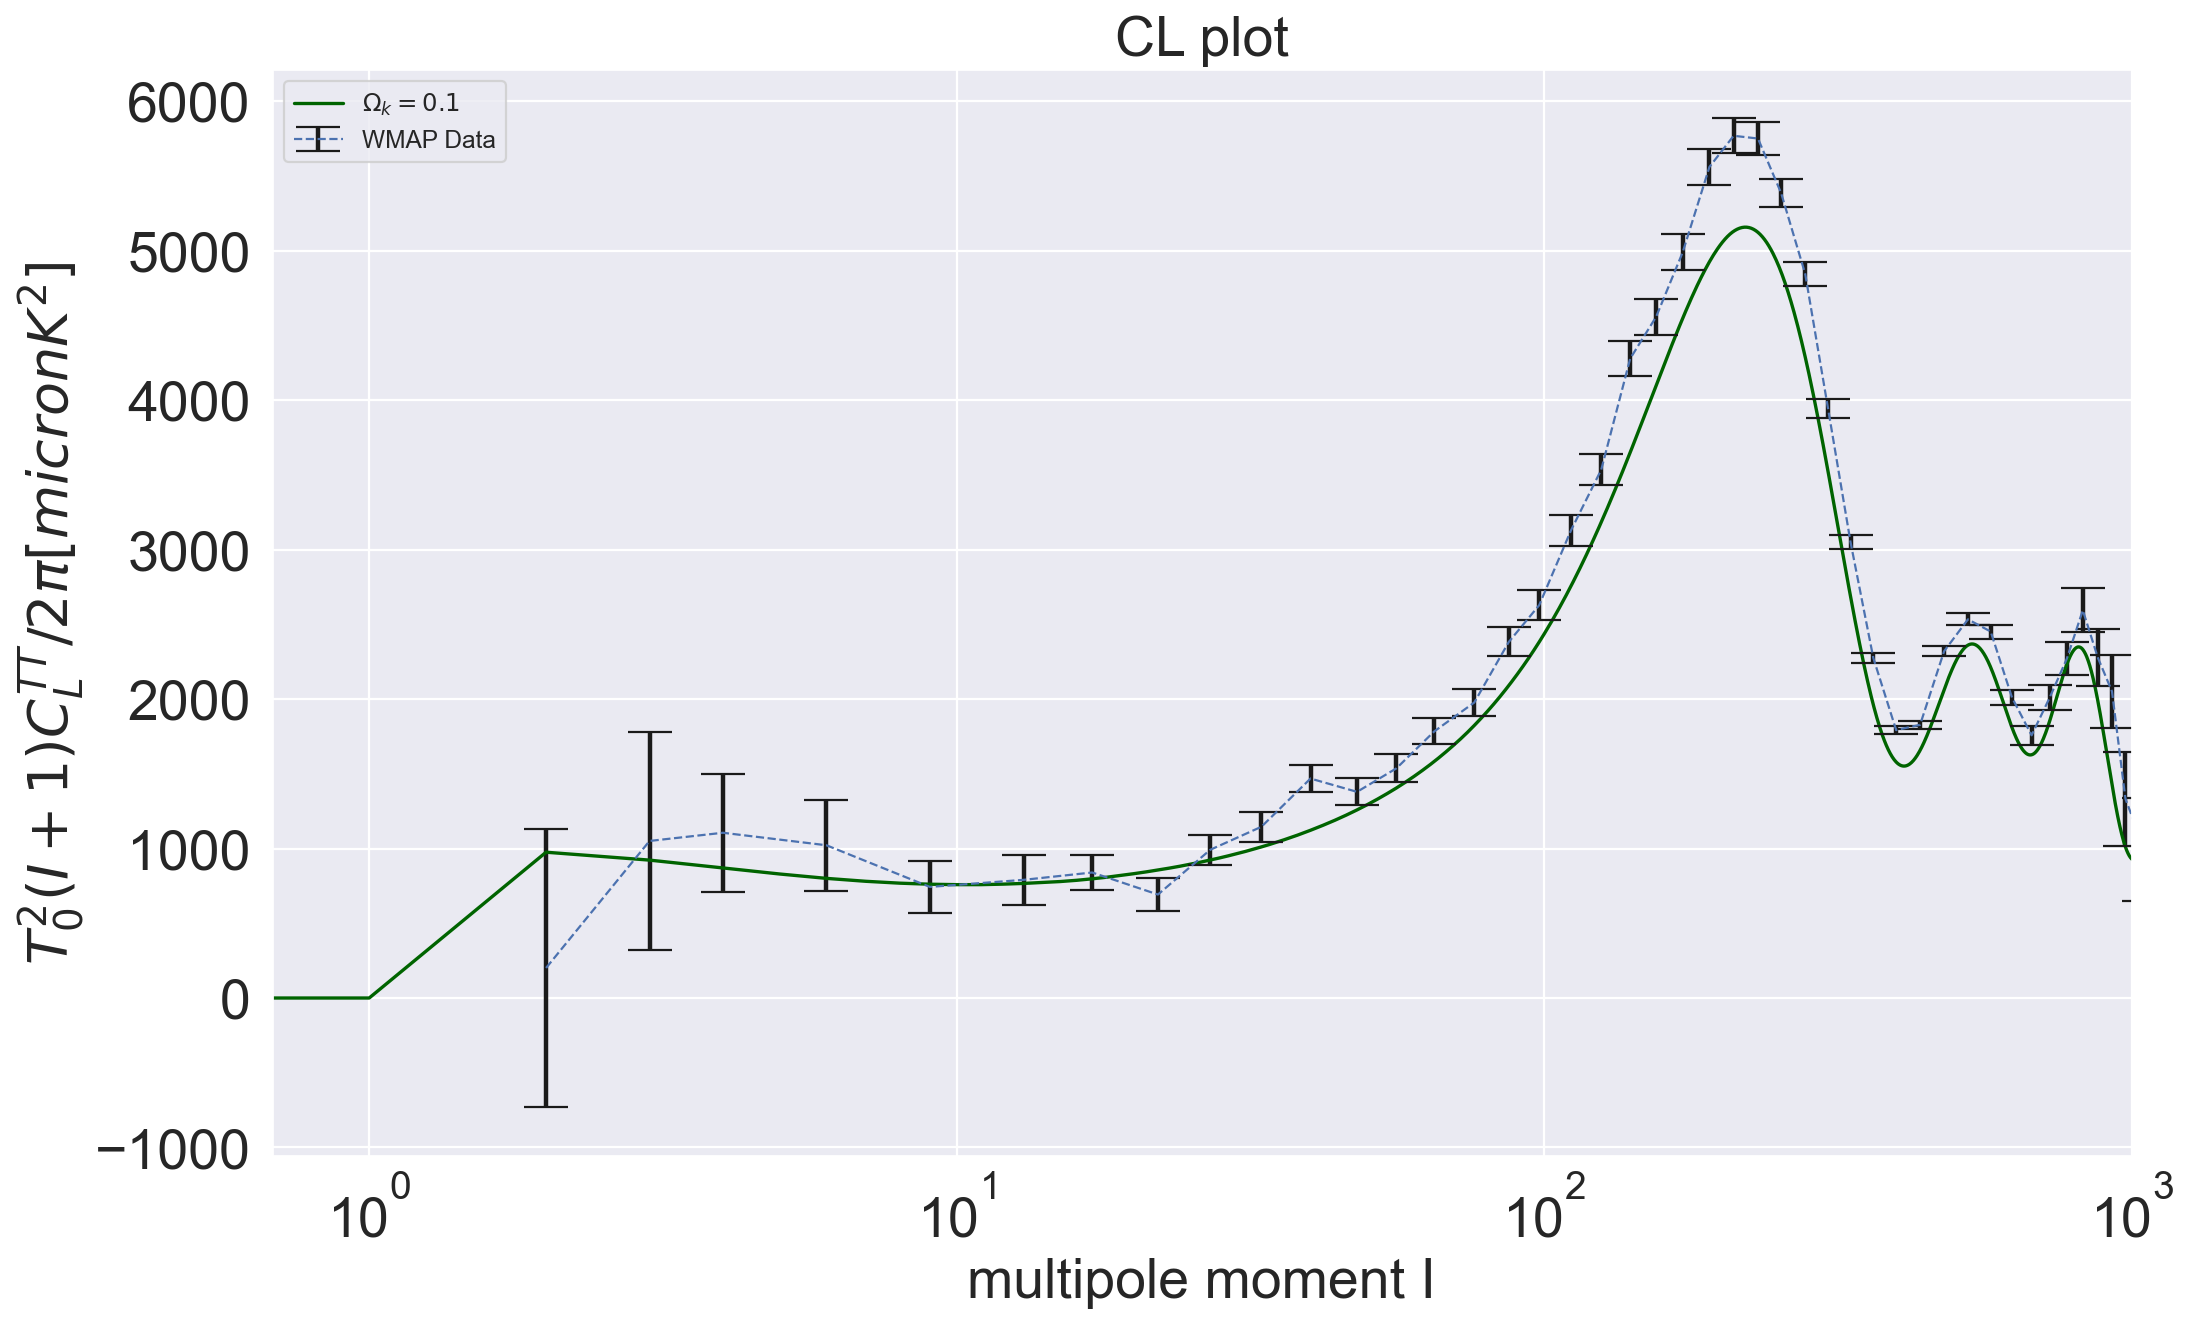

In [25]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= 0.1, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7    
 
    
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)
g = (theta_z.diff(z))

p = simplify((g/theta_z))

W_z = ((p*(1+z))/3) -1

c = (1/a) - 1
s = cbrt((1-Omega_m)/Omega_m)
T = 2*sqrt(s)*(1-(1/14)*s**3)

T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3)

D = (((1+z)/(s*Omega_m))*((T-T_s)))

D = D.subs(z,c)

E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m))
E_z = E_z.subs(z,c)
d=(1/a)/E_z + D /(1/a)

Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1

#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')

from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = 0.1$','WMAP Data'], loc ='upper left')
plt.show()


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-26-953886bc3eb1>:121: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


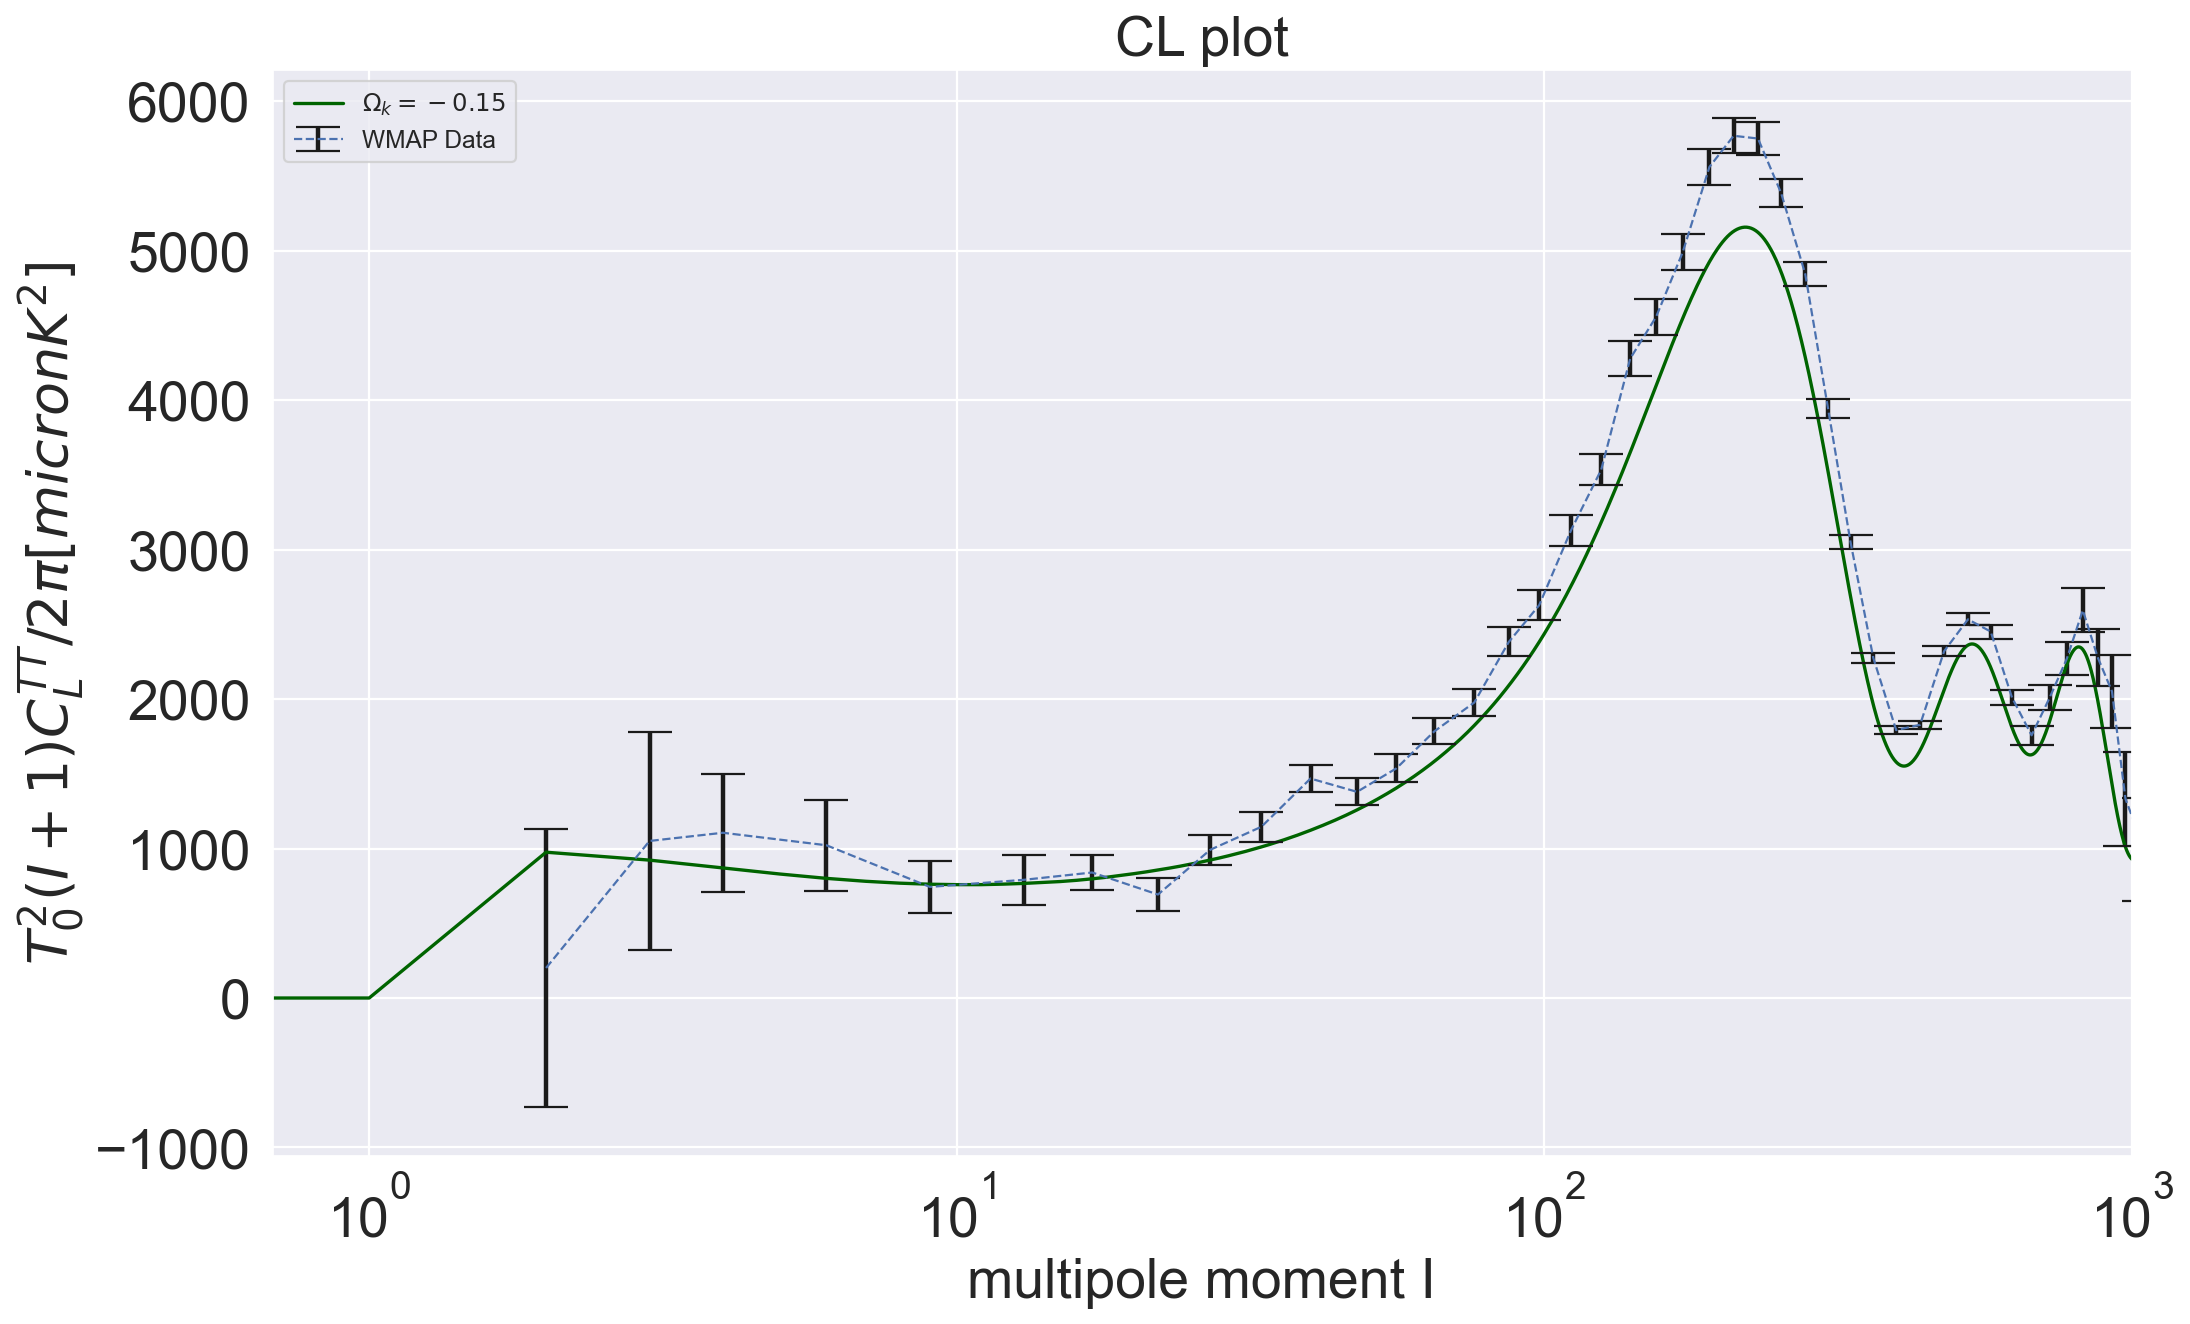

In [26]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= -0.15, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7    
 
    
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)
g = (theta_z.diff(z))

p = simplify((g/theta_z))

W_z = ((p*(1+z))/3) -1

c = (1/a) - 1
s = cbrt((1-Omega_m)/Omega_m)
T = 2*sqrt(s)*(1-(1/14)*s**3)

T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3)

D = (((1+z)/(s*Omega_m))*((T-T_s)))

D = D.subs(z,c)

E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m))
E_z = E_z.subs(z,c)
d=(1/a)/E_z + D /(1/a)

Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1

#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')

from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = -0.15$','WMAP Data'], loc ='upper left')
plt.show()


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-27-658d1d782c5a>:121: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


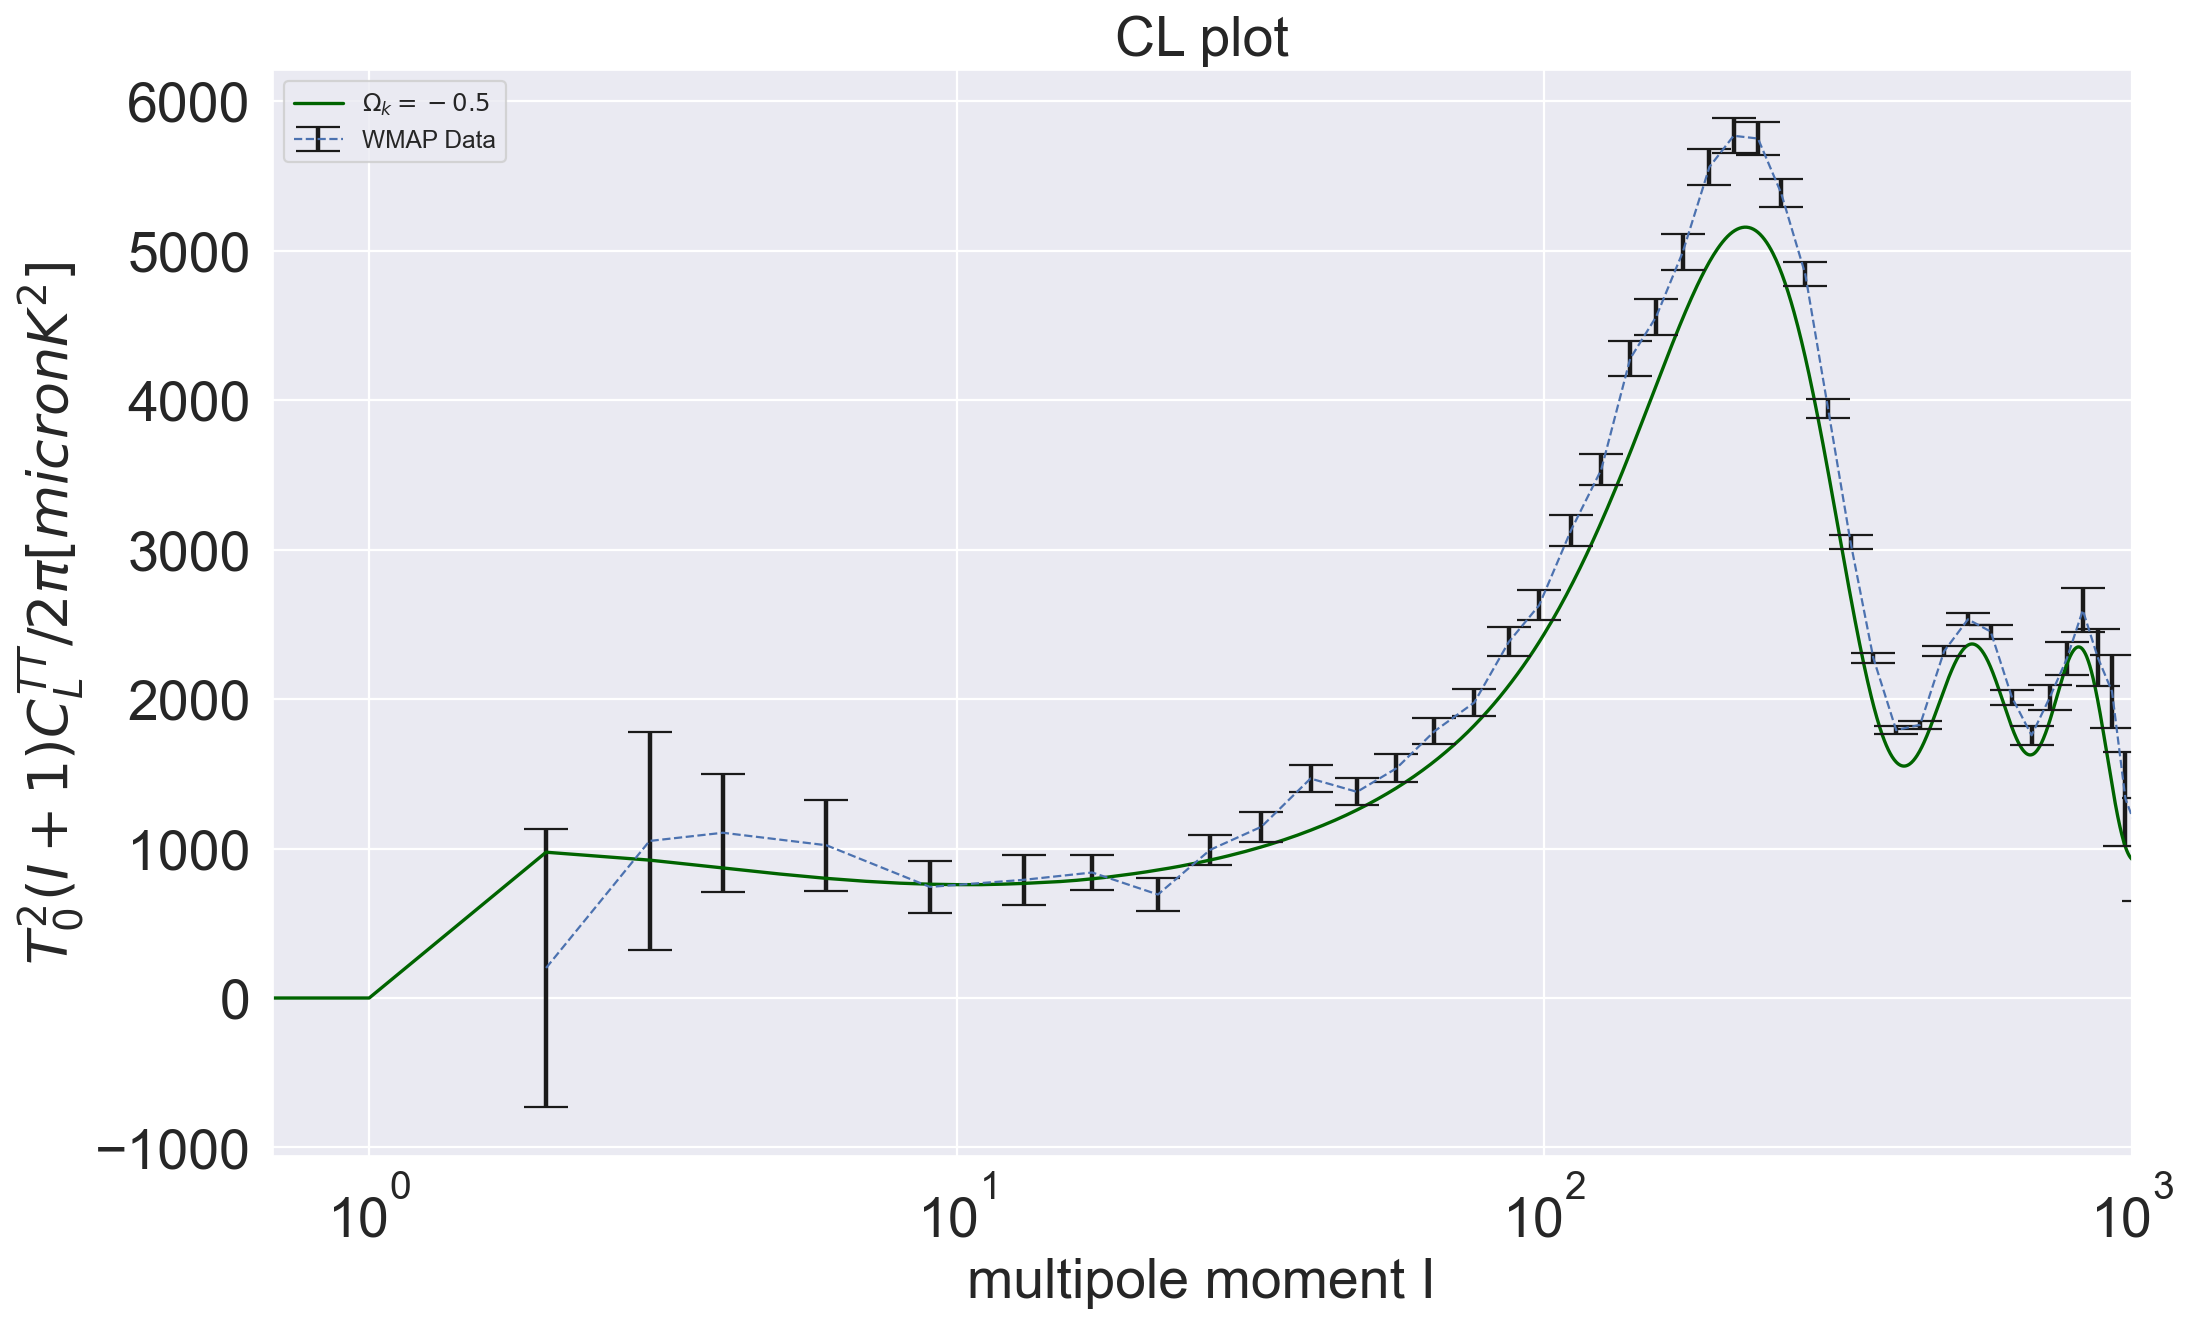

In [27]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= -0.5, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7    
 
    
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)
g = (theta_z.diff(z))

p = simplify((g/theta_z))

W_z = ((p*(1+z))/3) -1

c = (1/a) - 1
s = cbrt((1-Omega_m)/Omega_m)
T = 2*sqrt(s)*(1-(1/14)*s**3)

T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3)

D = (((1+z)/(s*Omega_m))*((T-T_s)))

D = D.subs(z,c)

E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m))
E_z = E_z.subs(z,c)
d=(1/a)/E_z + D /(1/a)

Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1

#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')

from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = -0.5$','WMAP Data'], loc ='upper left')
plt.show()


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
Table-interpolated parameters (w and wa are set to estimated values at 0):

 class: <DarkEnergyPPF>
 w = -0.9995238095238096
 wa = -0.24051594599387133
 cs2 = 1.0
 use_tabulated_w = True
 
(2051, 4)
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-28-25cfd4b1e921>:121: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


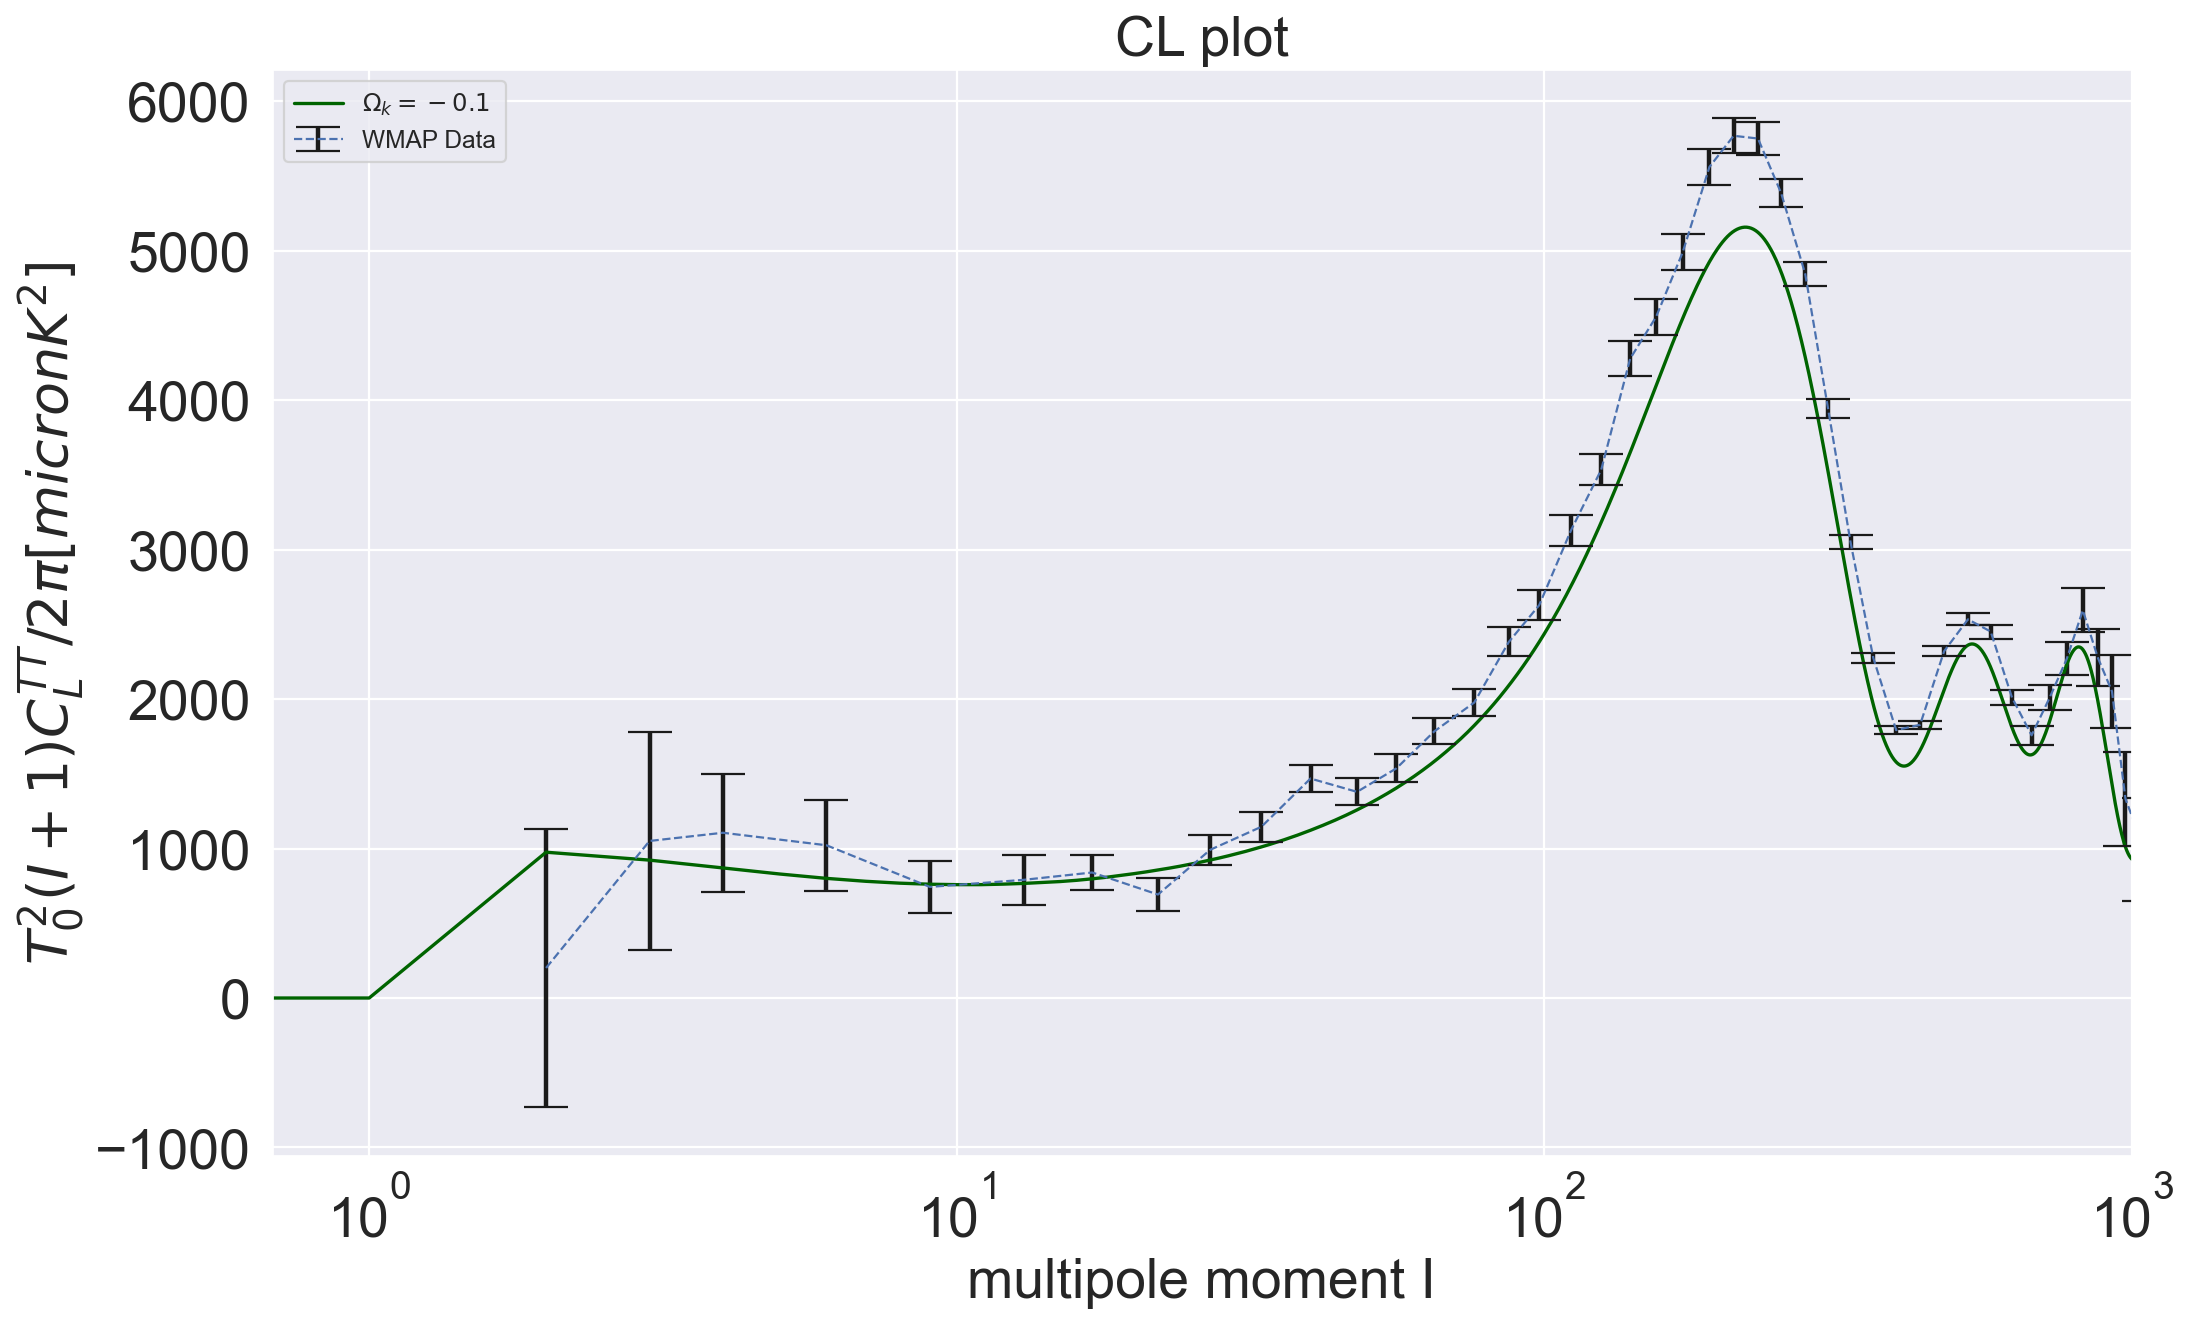

In [28]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=75, ombh2=0.022, omch2=0.315, mnu=0.06, omk= -0.1, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

Omega_m,Omega_k, Omega_o,Omega_d = symbols('Omega_m Omega_k Omega_o Omega_d', real = True, constant = True)
Omega_m = 0.3
Omega_d = 0.7    
 
    
theta_z = Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2) -((1-Omega_k - Omega_d)*((1+z)**3)) -Omega_k*(1+z)**2;simplify(theta_z)
g = (theta_z.diff(z))

p = simplify((g/theta_z))

W_z = ((p*(1+z))/3) -1

c = (1/a) - 1
s = cbrt((1-Omega_m)/Omega_m)
T = 2*sqrt(s)*(1-(1/14)*s**3)

T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3)

D = (((1+z)/(s*Omega_m))*((T-T_s)))

D = D.subs(z,c)

E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m))
E_z = E_z.subs(z,c)
d=(1/a)/E_z + D /(1/a)

Wa = (((-2*Omega_k*(Omega_m -1)*(1/a)*D*d) + (2*Omega_k*(Omega_m-1)*D**2) + 
      ( ((1/a)**3)*((2*Omega_k*Omega_m*(1/a)*D*d) + (Omega_k*Omega_m*D**2) -(2*Omega_k*(1/a)) 
                    + (3*Omega_m*(1/a)**2) +((3*(1/a)**2)*(Omega_d+Omega_k-1))))) /  
       (3*((-Omega_k*(Omega_m-1)*D**2) + (((1/a)**2)*(Omega_k*Omega_m*(1/a)*D**2)) - 
          (Omega_k*(1/a)**2) + (Omega_m*(1/a)**3) - Omega_m + (((1/a)**3)*(Omega_d + Omega_k -1)) +1))) - 1

#creating an array of a 
def  a_1(z):
    v = 1/(1+z)
    return v
a_i = []
for i in range(0,3):
    a_i.append(float(a_1(i)))
a_i.sort(reverse = False)
a_i = np.array(a_i)
a_i=a_i.astype('float64')

#creating an array of w(a)
j=0
WEZ =[]
while j<len(a_i):
    h = Wa.subs(a,a_i[j])
    WEZ.append(h)
    j +=1
WEZ = np.array(WEZ)
WEZ=WEZ.astype('float64')

from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
pars.DarkEnergy= DarkEnergyPPF()
pars.DarkEnergy.set_w_a_table(a_i, WEZ)
print('Table-interpolated parameters (w and wa are set to estimated values at 0):\n\n' 
      ,pars.DarkEnergy)
results2 = camb.get_background(pars)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)


powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays
figure(figsize=(15, 9), dpi=80)

ls = np.arange(totCL.shape[0])
plt.plot(ls,unlensedCL[:,0], color='darkgreen')

for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10, ls = '--')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I')
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['$\Omega_k = -0.1$','WMAP Data'], loc ='upper left')
plt.show()
